# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

In [217]:
import pandas as pd
import requests

# 1) seu código aqui
df = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
df.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [218]:
# 2) seu código aqui
df.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [221]:
# 3) seu código aqui

df = df[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',   'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]
df.head(5)

df = df.dropna(subset=["APGAR5"])
df.isna().sum()



LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

In [223]:
# 4) seu código aqui
df = df.dropna(subset=["APGAR5"])
df.isna().sum()


LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

In [225]:
# 5) seu código aqui

colunas_edit = ['ESTCIVMAE', 'CONSULTAS']
df[colunas_edit] = df[colunas_edit].replace(9,0)

df['ESTCIVMAE']
                                       

0        5.0
1        2.0
2        0.0
3        5.0
4        2.0
        ... 
27023    2.0
27024    1.0
27025    2.0
27026    2.0
27027    5.0
Name: ESTCIVMAE, Length: 26925, dtype: float64

In [227]:
# 6) Seu código aqui
df['QTDFILVIVO'].fillna(0)

0        0.0
1        1.0
2        2.0
3        0.0
4        1.0
        ... 
27023    1.0
27024    0.0
27025    0.0
27026    1.0
27027    1.0
Name: QTDFILVIVO, Length: 26925, dtype: float64

In [229]:
# 7) seu código aqui

df['ESTCIVMAE'] = df['ESTCIVMAE'].fillna("nao informado")
df['ESCMAE'] = df['ESCMAE'].fillna("nao informado")
df['QTDFILVIVO'] = df['QTDFILVIVO'].fillna("nao informado")
df['GESTACAO'] = df['GESTACAO'].fillna("nao informado")
df['GRAVIDEZ'] = df['GRAVIDEZ'].fillna("nao informado")

df.isna().sum()


LOCNASC       0
IDADEMAE      0
ESTCIVMAE     0
ESCMAE        0
QTDFILVIVO    0
GESTACAO      0
GRAVIDEZ      0
CONSULTAS     0
APGAR5        0
dtype: int64

In [231]:
# 8) seu código aqui

    

df.loc[df['APGAR5'] <= 3, 'Situaçao'] = 'asfixia severa'

df.loc[(df['APGAR5'] > 3) & (df['APGAR5'] <= 5),'Situaçao'] = 'asfixia moderada'

df.loc[(df['APGAR5'] > 5) & (df['APGAR5'] <= 7),'Situaçao'] = 'asfixia leve'

df.loc[(df['APGAR5'] > 7), 'Situaçao'] = 'Normal'

df.head(20)

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,Situaçao
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Normal
2,1,37,0.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0,Normal
6,1,37,1.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal
7,1,27,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,10.0,Normal
8,1,20,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,3,9.0,Normal
9,1,30,2.0,1 a 3 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal


In [233]:
# 9) seu código aqui
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()



,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,situaçao
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Normal
2,1,37,0.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal


In [264]:

import matplotlib.pyplot as plt

por_idade= df[['idademae','apgar5']]

df.loc[(df['idademae'] > 17) & (df['idademae'] <= 30),'grupo_idade'] = 'entre 19 e 30'
df.loc[(df['idademae'] > 30) & (df['idademae'] <= 40),'grupo_idade'] = 'entre 30 e 40'
df.loc[(df['idademae'] > 40),'grupo_idade'] = 'maior de 40'



asfixia_severa = df[df['situaçao'] == "asfixia severa"]
asfixia_moderada = df[df['situaçao'] == "asfixia moderada"]
normal = df[df['situaçao'] == "Normal"]
asfixia_leve = df[df['situaçao'] == "asfixia leve"]

asfixia_severa['grupo_idade']
asfixia_moderada['idademae']
normal['idademae']
asfixia_leve['idademae']


asfixia_severa.head()



,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,situaçao,grupo_idade
20,4,29,5.0,4 a 7 anos,3.0,32 a 36 semanas,Única,3,0.0,asfixia severa,entre 19 e 30
185,1,24,1.0,8 a 11 anos,0.0,22 a 27 semanas,Única,3,3.0,asfixia severa,entre 19 e 30
1095,3,24,1.0,4 a 7 anos,3.0,28 a 31 semanas,Única,1,2.0,asfixia severa,entre 19 e 30
1292,1,19,2.0,4 a 7 anos,0.0,22 a 27 semanas,Única,2,0.0,asfixia severa,entre 19 e 30
1455,1,26,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,1.0,asfixia severa,entre 19 e 30


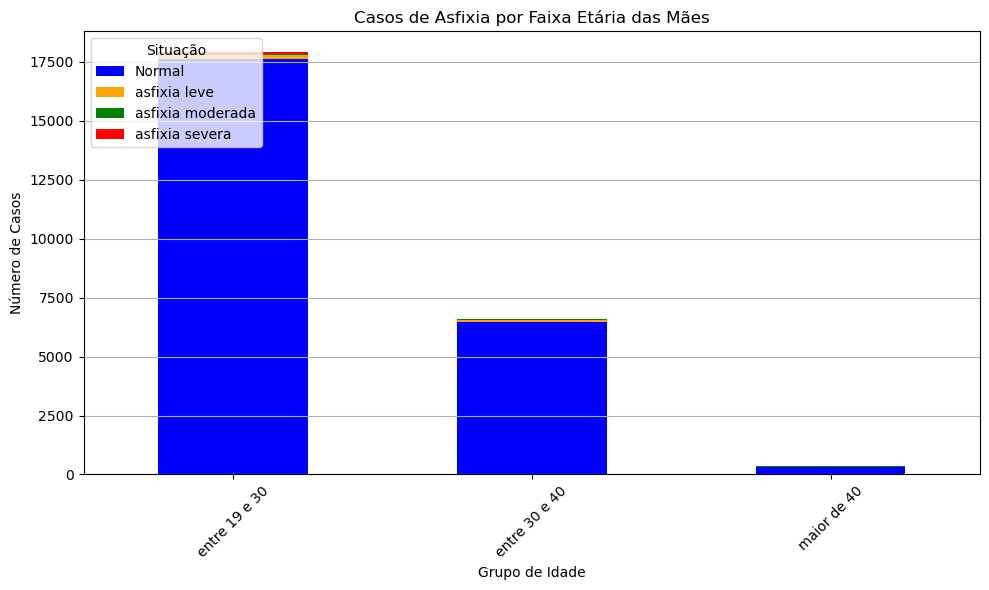

In [276]:
import matplotlib.pyplot as plt


contagem = df.groupby(['grupo_idade', 'situaçao']).size().unstack(fill_value=0)

contagem.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'green', 'red'])

plt.title('Casos de Asfixia por Faixa Etária das Mães')
plt.xlabel('Grupo de Idade')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(title='Situação', loc='upper left')
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
#aqui vemos que a idade parece ser um fator muito estavel para se ter uma conclusao.